<a href="https://colab.research.google.com/github/khoirulromadhon/PCVK_Genap_2022/blob/main/Praktikum_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

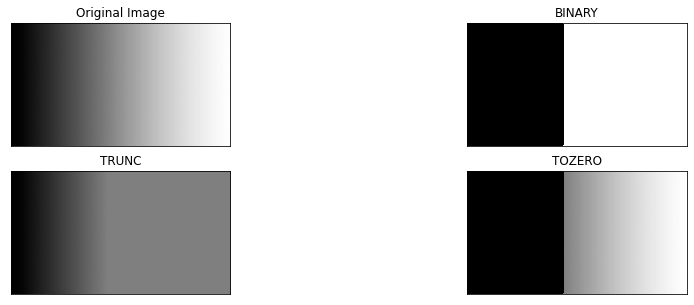

In [4]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv2.imread(filename) 
thresholdBinary = cv2.imread(filename) 
thresholdTrunc = cv2.imread(filename) 
thresholdTozero = cv2.imread(filename) 

threshold = 127

#Threshold Binary
thresholdBinary[img>threshold] = 255
thresholdBinary[img<=threshold] = 0

#Threshold Truncate 
thresholdTrunc[img>threshold] = threshold

#Threshold Tozero 
thresholdTozero[img<=threshold] = 0

names = ['Original Image','BINARY','TRUNC','TOZERO'] 
images = [img, thresholdBinary, thresholdTrunc, thresholdTozero]


plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(names[i])
  plt.xticks([]),plt.yticks([]) 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

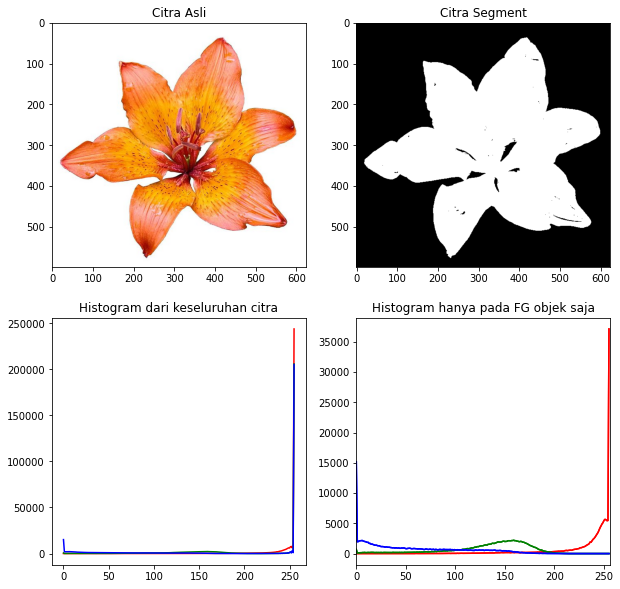

In [5]:
filename = ('/content/drive/MyDrive/PCVK/lily.jpg')
img = cv2.imread(filename) 
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f32d6035250>,
 <matplotlib.image.AxesImage at 0x7f32d799d310>)

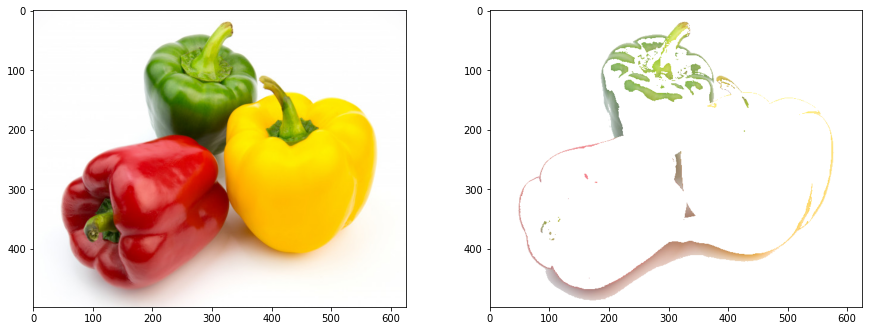

In [7]:
filename_4 = ('/content/drive/MyDrive/PCVK/peppers.jpg')
img_p = cv2.imread(filename_4) 
img_rgb2 = cv2.cvtColor(img_p,cv2.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)